In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data

In [2]:
dfloan = pd.read_csv("loan.csv") #export csv

C:\Users\scpow\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Sanity checks

In [3]:
dfloan.index

RangeIndex(start=0, stop=39717, step=1)

In [4]:
dfloan.shape #get the shape of data

(39717, 111)

In [5]:
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
dfloan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Data cleaning

In [7]:
#to display all values in o/p 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
dfloan.loc[:,dfloan.isnull().sum() > 0].isnull().sum()

emp_title                          2459
emp_length                         1075
desc                              12940
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


##### We observed that many columns donot have any data in them; all values are null so dropping them

In [9]:
dfloan = dfloan.drop(columns=dfloan.loc[:,dfloan.isnull().sum() == 39717].columns)
dfloan.shape

(39717, 57)

##### Earlier we had 111 columns; now we see 57 columns that means <i><b> 54 columns had all null values.

In [10]:
#checking columns having missing values
dfloan.loc[:,dfloan.isnull().sum() > 0].isnull().sum()

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [11]:
#calculating missing value percentage
round(dfloan.loc[:,dfloan.isnull().sum() > 0].isnull().sum()/len(dfloan.index),2) * 100

emp_title                      6.0
emp_length                     3.0
desc                          33.0
title                          0.0
mths_since_last_delinq        65.0
mths_since_last_record        93.0
revol_util                     0.0
last_pymnt_d                   0.0
next_pymnt_d                  97.0
last_credit_pull_d             0.0
collections_12_mths_ex_med     0.0
chargeoff_within_12_mths       0.0
pub_rec_bankruptcies           2.0
tax_liens                      0.0
dtype: float64

##### next_pymnt_d, mths_since_last_record has more than 90% null values, so we are dropping these columns                

In [12]:
dfloan = dfloan.drop(columns=['next_pymnt_d','mths_since_last_record'])
dfloan.shape

(39717, 55)

<pre>
<b>url</b> is uniquely indentifialble with the id in the str which is same as member id
similarly, <b>title and desc</b> donot add any additional info 
Also, <b>mths_since_last_delinq</b> column in not required for our current analysis
so dropping these columns 

In [13]:
dfloan = dfloan.drop(columns=['url','desc','title','mths_since_last_delinq'])
dfloan.shape

(39717, 51)

##### more than 6% of records in the emp_title column are null so creating new category as "No Title"

In [14]:
dfloan["emp_title"] = dfloan["emp_title"].fillna('No Title')
#dfloan.emp_title.value_counts()

##### emp_lenght has only 3% null values so we are dropping these values from the column

In [15]:
dfloan = dfloan[~dfloan['emp_length'].isnull()]

##### emp_lenght has too many junk characters in its values such as (>, <, years, year) we need to eliminate these to have a standard integer data in it

In [16]:
dfloan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [17]:
dfloan["emp_length"] = dfloan["emp_length"].str.replace(' years','')
dfloan["emp_length"] = dfloan["emp_length"].str.replace(' year','')
dfloan["emp_length"] = dfloan["emp_length"].str.replace('+','')
dfloan["emp_length"] = dfloan["emp_length"].str.replace('< ','')

<ipython-input-17-fd82b6d32ddd>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dfloan["emp_length"] = dfloan["emp_length"].str.replace('+','')


In [18]:
dfloan.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [19]:
dfloan["emp_length"]  = dfloan["emp_length"].astype("int64")

In [20]:
#calculating missing value percentage
dfloan.loc[:,dfloan.isnull().sum() > 0].isnull().sum()

revol_util                     47
last_pymnt_d                   66
last_credit_pull_d              2
collections_12_mths_ex_med     56
chargeoff_within_12_mths       56
pub_rec_bankruptcies          697
tax_liens                      39
dtype: int64

##### Below columns have only one value i.e. single value columns so dropping them
Columns: collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens

In [21]:
for i in ('collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'):
    x = dfloan[i].value_counts()
    print(f"--->Column name: {i} \n--->value is:\n{x}")


--->Column name: collections_12_mths_ex_med 
--->value is:
0.0    38586
Name: collections_12_mths_ex_med, dtype: int64
--->Column name: chargeoff_within_12_mths 
--->value is:
0.0    38586
Name: chargeoff_within_12_mths, dtype: int64
--->Column name: tax_liens 
--->value is:
0.0    38603
Name: tax_liens, dtype: int64


In [22]:
#those columns values are zero
dfloan = dfloan.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'])

In [23]:
dfloan.loc[:,dfloan.isnull().sum() > 0].isnull().sum()

revol_util               47
last_pymnt_d             66
last_credit_pull_d        2
pub_rec_bankruptcies    697
dtype: int64

In [24]:
dfloan.pub_rec_bankruptcies.value_counts()

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [25]:
#Imputing missing data 
dfloan["pub_rec_bankruptcies"] = dfloan["pub_rec_bankruptcies"].fillna(0) 

In [26]:
dfloan.shape

(38642, 48)

In [27]:
#cleaning int_rate data by removing % symbol from each record in the col
dfloan["int_rate"] = dfloan["int_rate"].str.replace('%','')

In [28]:
#changing its dtype to float
dfloan["int_rate"]  = dfloan["int_rate"].astype("float32")

In [29]:
dfloan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float32
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util          

In [30]:
#checking no. of unique records for each column in the dataset
dfloan.nunique()

id                         38642
member_id                  38642
loan_amnt                    880
funded_amnt                 1038
funded_amnt_inv             8097
term                           2
int_rate                     371
installment                15149
grade                          7
sub_grade                     35
emp_title                  28776
emp_length                    10
home_ownership                 5
annual_inc                  5100
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
purpose                       14
zip_code                     822
addr_state                    50
dti                         2863
delinq_2yrs                   11
earliest_cr_line             515
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21434
revol_util                  1087
total_acc                     82
initial_li

In [31]:
# dropping columns where only 1 value for the entire column
dfloan = dfloan.drop(columns=dfloan.loc[:,dfloan.nunique() == 1].columns)
dfloan.shape

(38642, 42)

In [32]:
dfloan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

##### Converting issue_d to datetime and then extracting year and month columns from it

In [33]:
dfloan['issue_d'] = pd.to_datetime(dfloan['issue_d'],format='%b-%y')

In [34]:
dfloan['issue_year'] = pd.DatetimeIndex(dfloan['issue_d']).year

In [35]:
dfloan['issue_month'] = pd.DatetimeIndex(dfloan['issue_d']).month

# Univariate Analysis

In [36]:
#selecting features for analysis

required_columns = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status','issue_d', 'loan_status', 'purpose','issue_year','issue_month']

In [37]:
#creating new df of only required columns

dfloan2 = dfloan[required_columns]

In [38]:
dfloan2.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,issue_year,issue_month
0,1077501,1296599,5000,5000,36 months,10.65,162.87,B,B2,No Title,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,2011,12
1,1077430,1314167,2500,2500,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,2011,12
2,1077175,1313524,2400,2400,36 months,15.96,84.33,C,C5,No Title,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,2011,12
3,1076863,1277178,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,2011,12
4,1075358,1311748,3000,3000,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,2011,12


In [39]:
dfloan2.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

##### Removing entries where loan_status is Current as the current loan transaction is ongoing one and will not help in analysing if a customer will default or not

In [40]:
dfloan2 = dfloan2[dfloan2.loan_status != "Current"]

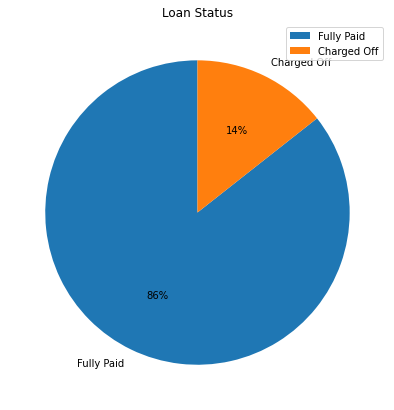

In [41]:
plt.figure(figsize = [9,7])
mylables = ["Fully Paid", "Charged Off"]

plt.pie(dfloan2['loan_status'].value_counts(),startangle=90,labels = mylables,autopct='%1.0f%%')
plt.title('Loan Status')
plt.legend()
plt.show()

##### we can observe that 86% cutomers have fully paid the loan but 14% have been charged off

In [42]:
#Converting to numeric 
dfloan2['loan_status_numeric'] = dfloan2['loan_status']
dfloan2['loan_status_numeric'] = dfloan2['loan_status_numeric'].str.replace('Fully Paid','0')
dfloan2['loan_status_numeric'] = dfloan2['loan_status_numeric'].str.replace('Charged Off','1')

In [43]:
dfloan2['loan_status_numeric']= dfloan2['loan_status_numeric'].astype('int64')
dfloan2['loan_status_numeric'].value_counts()

0    32145
1     5399
Name: loan_status_numeric, dtype: int64

In [44]:
dfloan2['loan_status_numeric'].mean()

0.14380460259961644

##### we can say that default rate is 14%

In [45]:
dfloan2.term.value_counts()

 36 months    28287
 60 months     9257
Name: term, dtype: int64

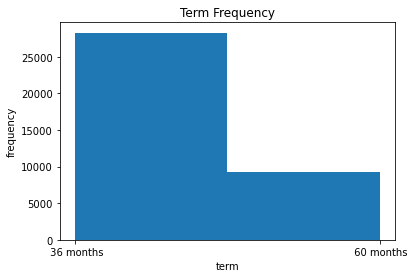

In [46]:
plt.hist(dfloan2.term,bins=2)
plt.title('Term Frequency')
plt.xlabel('term')
plt.ylabel('frequency')
plt.show()

##### we observe that majority people take 36months term loan compared to 60months

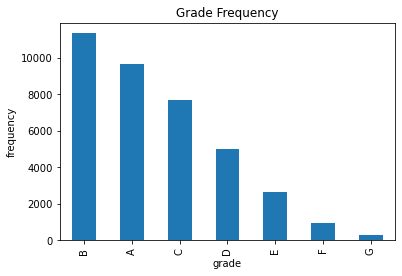

In [47]:
dfloan2['grade'].value_counts().plot.bar()
plt.title('Grade Frequency')
plt.xlabel('grade')
plt.ylabel('frequency')
plt.show()

##### We observe that we have comparitively more number of  A, B and C grade customers than others which is logical and good distribution while lending money as we have more no. of quality customers

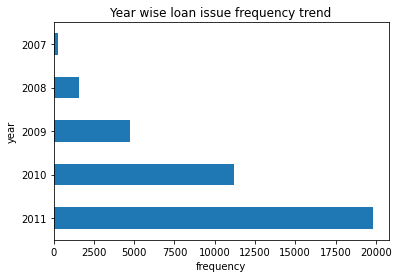

In [48]:
dfloan2['issue_year'].value_counts().plot.barh()
plt.title('Year wise loan issue frequency trend')
plt.xlabel('frequency')
plt.ylabel('year')
plt.show()

##### We see an increasing trend in the loan taken/issued over the years

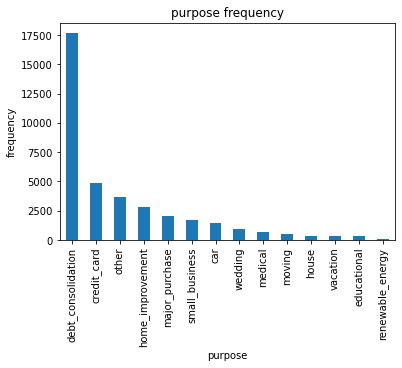

In [50]:
dfloan2['purpose'].value_counts().plot.bar()
plt.title('purpose frequency')
plt.xlabel('purpose')
plt.ylabel('frequency')
plt.show()

##### we observe that loan is majorly taken for debt_consolidation

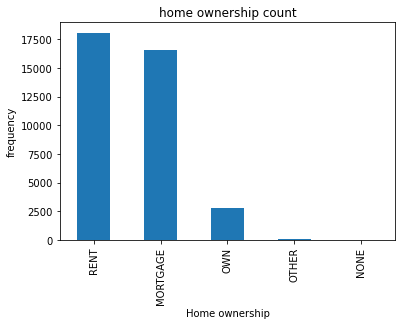

In [51]:
dfloan2['home_ownership'].value_counts().plot.bar()
plt.title('home ownership count')
plt.xlabel('Home ownership')
plt.ylabel('frequency')
plt.show()

##### we observe that for majority customers home ownership is either rent or mortgage; comparitively only a small chunk of customers own their house

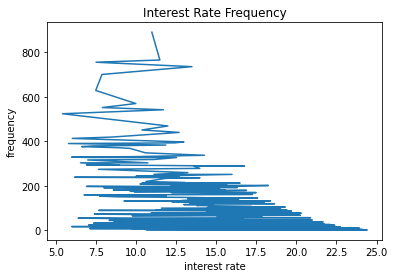

In [52]:
dfloan2['int_rate'].value_counts().plot.line()
plt.title('Interest Rate Frequency')
plt.xlabel('interest rate')
plt.ylabel('frequency')
plt.show()
#dfloan2['int_rate'].plot()

##### we observe that interest rate is between 5 to 25 percent

##### Converting interest rate to categorical data

In [53]:
def interest(n):
    if n < 10:
        return 'low'
    elif n>=10 and n<15:
        return 'medium'
    elif n>=15 and n<20:
        return 'high'
    else:
        return 'very high'

In [54]:
dfloan2['interest_category'] = dfloan2['int_rate'].apply(lambda val: interest(val))

# Segmented univariate analysis 

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

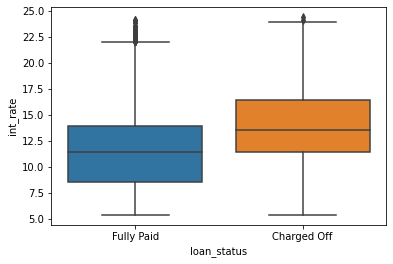

In [56]:
sns.boxplot(x = 'loan_status', y = 'int_rate', data = dfloan2)

##### we observe that median of charged off is significantly higher than that of fully paid i.e. when intrest rate is high the probablity of default is higher.  

# Bivariate analysis

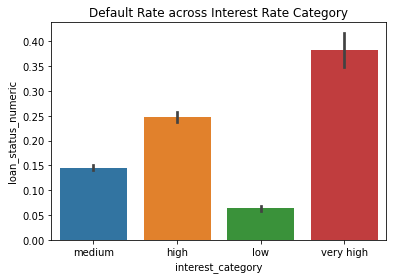

In [57]:
sns.barplot(x='interest_category', y='loan_status_numeric', data = dfloan2)
plt.title('Default Rate across Interest Rate Category')
plt.show()


##### we observe that customers whose loans are in <b>very high</b> interest rate category have a comparitively higher tendecy to default followed by high, medium and lastly low

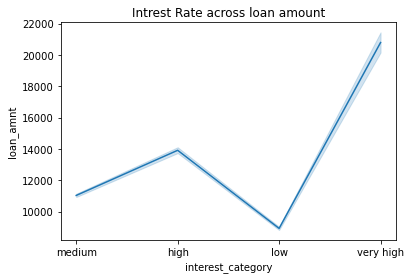

In [60]:
sns.lineplot(x='interest_category', y='loan_amnt', data = dfloan2)
plt.title('Intrest Rate across loan amount')
plt.show()


##### when loan amount is low, interest category is also low and it increases linearly in the order medium, high, very high as the loan amount increases

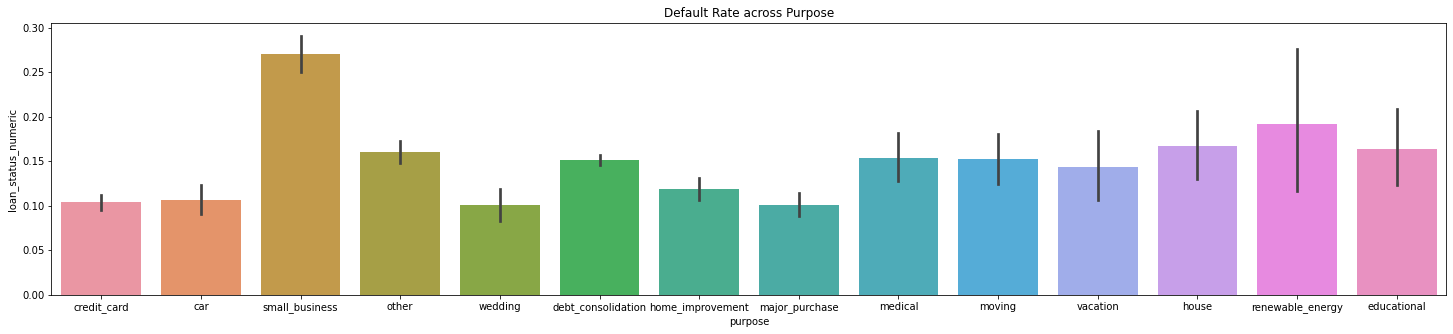

In [61]:
plt.figure(figsize=(25,5))
sns.barplot(x='purpose', y='loan_status_numeric', data = dfloan2)
plt.title('Default Rate across Purpose')
plt.show()

##### Frequency of small businesses defaulting is very high compared to others

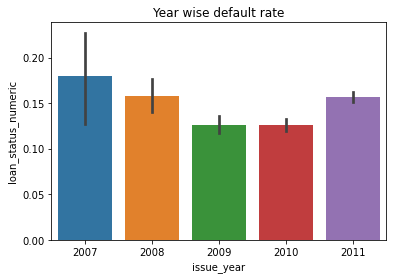

In [62]:
sns.barplot(x='issue_year', y='loan_status_numeric', data = dfloan2)
plt.title('Year wise default rate')
plt.show()

##### Default rate was max in 2007 after which it kept on dropping till 2009. But from 2010 we see a steady rise in default rate

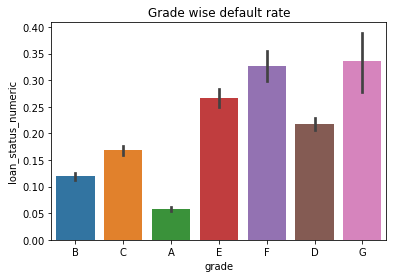

In [63]:
sns.barplot(x='grade', y='loan_status_numeric', data = dfloan2)
plt.title('Grade wise default rate')
plt.show()

##### We observe an increasing trend in default rate from Grade A to G

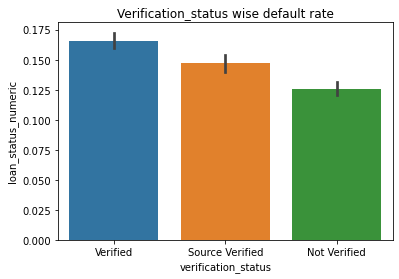

In [64]:
sns.barplot(x='verification_status', y='loan_status_numeric', data = dfloan2)
plt.title('Verification_status wise default rate')
plt.show()

##### We observe that default rate for verified customers is significantly more than that for non verified customers

# Multivariate Analysis

In [65]:
grade_term_defaultRate = pd.pivot_table(data = dfloan2, values = "loan_status_numeric",index="term",columns = "grade",aggfunc = np.mean)
grade_term_defaultRate

grade,A,B,C,D,E,F,G
term,,,,,,,
36 months,0.056358,0.102685,0.142959,0.177918,0.20070,0.265700,0.375000
60 months,0.092105,0.185658,0.236997,0.288004,0.29949,0.343085,0.326446


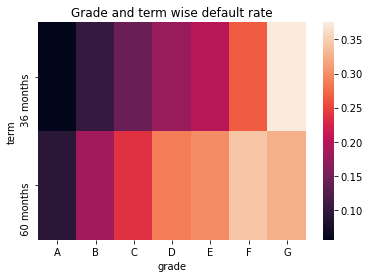

In [66]:
sns.heatmap(grade_term_defaultRate)
plt.title('Grade and term wise default rate')
plt.show()

##### from heat map we can conclude that a customers whose grade is G default the most in 36month term loan whereas F grade customers default the most in 60months term loan 

In [67]:
intrest_purpose_defaultRate = pd.pivot_table(data = dfloan2, values = "loan_status_numeric",index="interest_category",columns = "purpose",aggfunc = np.mean)
intrest_purpose_defaultRate

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
interest_category,,,,,,,,,,,,,,
high,0.238636,0.195155,0.249222,0.392857,0.210773,0.329268,0.197880,0.247788,0.215909,0.298188,0.058824,0.325328,0.181818,0.175676
low,0.051051,0.045760,0.065265,0.054945,0.050373,0.045045,0.043094,0.060086,0.115183,0.087542,0.142857,0.122249,0.115646,0.034247
medium,0.129353,0.112157,0.141699,0.182741,0.140549,0.140000,0.128118,0.178808,0.154717,0.155329,0.250000,0.288512,0.161290,0.111597
very high,0.333333,0.216216,0.391982,0.000000,0.250000,0.545455,0.300000,0.625000,0.250000,0.411765,1.000000,0.545455,0.000000,0.312500


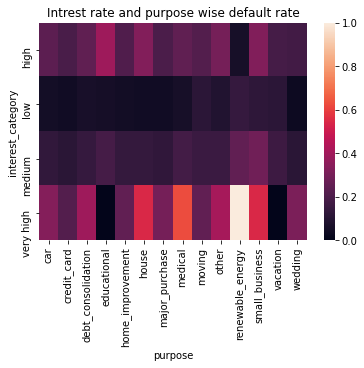

In [68]:
sns.heatmap(intrest_purpose_defaultRate)
plt.title('Intrest rate and purpose wise default rate')
plt.show()

##### We observe that renewable_energy purpose under very high interest category default the most